# Descriptive Statistics (Ch 3)

New Python Built-in functions: int

New functions in pandas: DataFrame

New methods in pandas: rank, mean, sum, max, var, std, sem, median, mode, size, loc, quantile

New functions in numpy: arange

New functions in matplotlib.pyplot: hist, show, plot, grid, title, xlabel, ylabel, scatter, boxplot

New function in stemgraphic: stem_graphic

For all examples we will use the same data file ch_1 as used in Ch 1

## New Python Built-in function

### int

Converts a real or integer-string to an integer

In [23]:
int(3.33)

3

# New Functions in pandas

### DataFrame

Used here to create a new computed column in df. 

In [24]:
url = 'https://raw.githubusercontent.com/APS1040/Day01/main/ch_1.csv'
import pandas as pd
df=pd.read_csv(url)
df.head()

,width,height
0,2.91,0.03
1,6.07,12.17
2,1.22,0.78
3,6.37,8.26
4,1.75,5.84


In [25]:
df['sum']=pd.DataFrame(df['width']+df['height'])
df.head()

,width,height,sum
0,2.91,0.03,2.94
1,6.07,12.17,18.24
2,1.22,0.78,2.00
3,6.37,8.26,14.63
4,1.75,5.84,7.59


## New methods in pandas

### rank

Finds the rank - all types 1 2 3 4, 1 2 2 4, 1 3 3 4, 1 2 2 3, 1 2.5 2.5 4 of data in df

In [26]:
df['ordinal']=df['sum'].rank(method='first')
df['std_comp']=df['sum'].rank(method='min')
df['mod_comp']=df['sum'].rank(method='max')
df['dense']=df['sum'].rank(method='dense')
df['fractional']=df['sum'].rank(method='average')
df.head()

,width,height,sum,ordinal,std_comp,mod_comp,dense,fractional
0,2.91,0.03,2.94,3.0,3.0,3.0,3.0,3.0
1,6.07,12.17,18.24,27.0,27.0,27.0,25.0,27.0
2,1.22,0.78,2.00,2.0,2.0,2.0,2.0,2.0
3,6.37,8.26,14.63,22.0,22.0,22.0,20.0,22.0
4,1.75,5.84,7.59,10.0,10.0,11.0,10.0,10.5


### mean, sum, max, var, std, sem, median, mode

In [27]:
df.width.mean()


4.533448275862069

In [28]:
df.width.sum()

131.47000000000003

In [29]:
df.width.max()

9.16

In [30]:
df.width.var(ddof=1)
# we need to set ddof=1 to divide by n-1. See help(np.var)

7.40638054187192

In [31]:
df.width.std(ddof=1)

2.721466615976011

In [32]:
df.width.sem() #standard error of the mean

0.5053636635912223

In [33]:
df.width.median()

4.58

In [34]:
df.width.mode()

0     0.05
1     0.35
2     1.05
3     1.22
4     1.28
5     1.75
6     2.03
7     2.21
8     2.52
9     2.69
10    2.91
11    3.61
12    3.65
13    4.05
14    4.58
15    5.20
16    5.51
17    5.55
18    6.06
19    6.07
20    6.37
21    6.44
22    6.57
23    7.59
24    7.91
25    8.04
26    8.28
27    8.77
28    9.16
dtype: float64

The reason that the entire data set is returned, is because each value is a mode as each value only occurs once. 

### size

Used here to count the number of items in a dataframe, or its columns. 

In [35]:
df.size

232

In [36]:
df.width.size

29

In [37]:
df.height.size

29

### loc

Used to find the location of a data item in the dataframe. First location is always 0. 

In [38]:
df.loc[df['width']==2.91]

,width,height,sum,ordinal,std_comp,mod_comp,dense,fractional
0,2.91,0.03,2.94,3.0,3.0,3.0,3.0,3.0


### quantile

Calculates values at the given quantile of a dataset. Examples calculate the median and IQR for the width.

In [39]:
df.width.quantile(.5)

4.58

In [40]:
IQR=df.width.quantile(.75)-df.width.quantile(.25)
print(IQR)

4.23


## New functions in numpy

## arange

Returns evenly spaced values within a given interval. The start defaults to zero. Used in graphing. 


In [41]:
import numpy as np
x_axis=np.arange(df.height.size)
print(x_axis)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


## New functions in matplotlib.pyplot

## hist, show

Draws a histogram. Also produces a cumulative histogram by setting cumulative = True

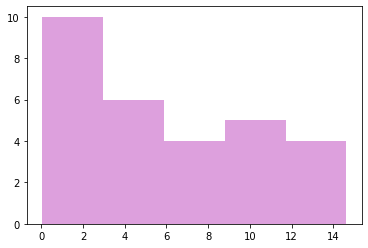

In [42]:
import matplotlib.pyplot as plt
plt.hist(df.height, color='plum', bins=5)
plt.show()

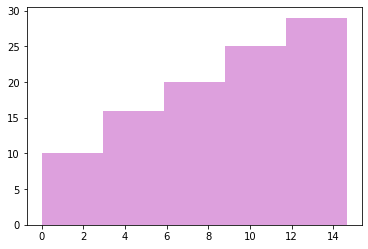

In [43]:
plt.hist(df.height, color='plum', bins=5, cumulative=True)
plt.show()

## plot, grid, title, xlabel, ylabel

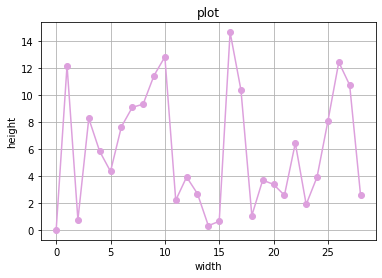

In [44]:
plt.grid(True)
plt.title('plot')
plt.xlabel('width')
plt.ylabel('height')
plt.plot(df.height, color='plum', marker='o')
plt.show()

## scatter

Same as plot, without joining lines. Need to provide x and y values. 


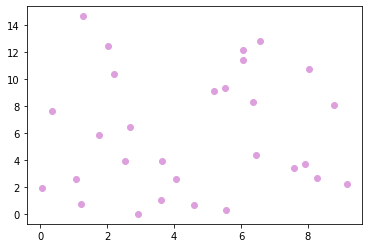

In [45]:
plt.scatter(df.width, df.height, color='plum', marker='o')
plt.show()

This second example just plots the heights against the index, to illustrate the use of the arange function that computed x_axis above. 

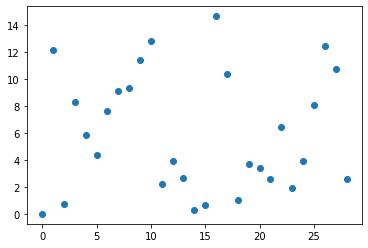

In [46]:
plt.scatter(x_axis, df.height)
plt.show()

### boxplot

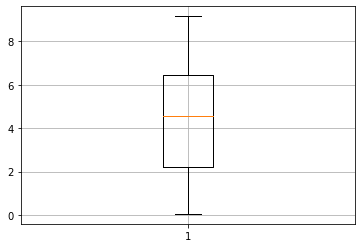

In [47]:
plt.boxplot(df.width)
plt.grid(True)
plt.show()

## New function in stemgraphic

In [48]:
# This package may not be installed on your computer
# To install stemgraphic, open Anaconda Prompt and type 'pip install stemgraphic' before importing it

### stem_graphic

draws a stem-and-leaf diagram
The asc option determines if the data is shown ascending (asc=True) or descending (asc=False)
By choosing the descending option it is easier to relate the diagram to a plot, which ascends left to right


     |████████████████████████████████| 71kB 6.7MB/s 


(<Figure size 540x234 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f0dfcbbc610>)

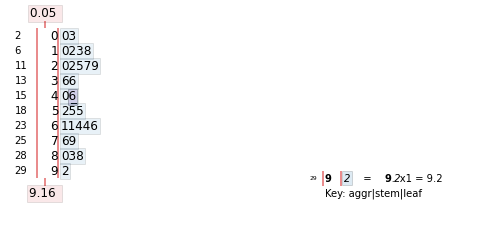

In [54]:
!pip install stemgraphic
import stemgraphic as stl
stl.stem_graphic(df.width, asc = False) 